<a href="https://colab.research.google.com/github/abhisingh007224/Abhi_house_prediction/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
df=files.upload()

Saving heart_disease.csv to heart_disease.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv("heart_disease.csv", sep=',', header=None, names=columns)

In [0]:
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [0]:
data.shape

(299, 14)

In [0]:
data.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [0]:
#data.describe()

In [0]:
corr=data.corr()

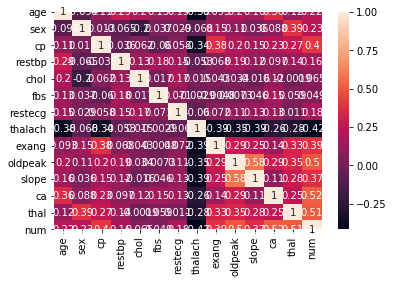

In [0]:
sns.heatmap(corr,annot=True)

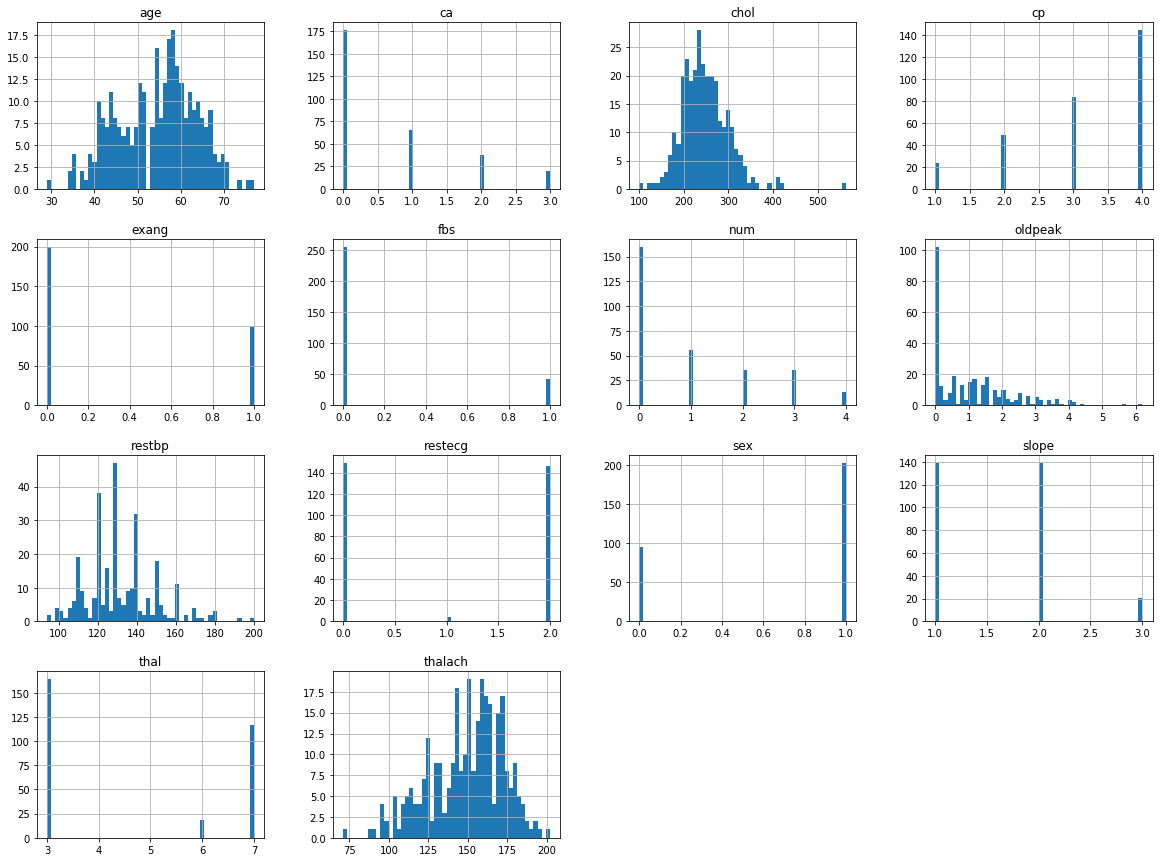

In [0]:

data.hist(bins=50, figsize=(20, 15))
plt.show()

In [0]:
X=data.drop('cp',axis=1)

In [0]:
X=data.iloc[:,0:14]
y=data['cp']

In [0]:
#normaliza the data
from sklearn.preprocessing import MinMaxScaler as Sc
norm=Sc()
X_o= norm.fit_transform(X)

In [0]:
names=['age', 'sex', 'cp','restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [0]:
names[0:14]

['age',
 'sex',
 'cp',
 'restbp',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [0]:
X_o = pd.DataFrame(X_o,columns=names[0:14])

In [0]:
X_o.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.286638,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.00
1,0.791667,1.0,1.000000,0.622642,0.400862,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,0.50
2,0.791667,1.0,1.000000,0.245283,0.278017,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,0.25
3,0.166667,1.0,0.666667,0.339623,0.323276,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.00
4,0.250000,0.0,0.333333,0.339623,0.224138,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.00


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_o,y,test_size=0.2,random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",logit.score(X_test,y_test))

Accuracy Score:  0.8833333333333333
